In [26]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline
load_dotenv()

True

In [105]:
def analyse_my_finance(tickers, timeframe, start_date, end_date, inv_amt, weights, num_sim, num_trade_days, plot):
    #Define variables
    tickers = tickers
    tf = timeframe
    start_date = pd.Timestamp(start_date, tz='America/New_York').isoformat()
    end_date = pd.Timestamp(end_date, tz='America/New_York').isoformat()
    wt = weights
    num_sim = num_sim
    num_trade_days=num_trade_days
    
    #Read in alpaca keys
    alpaca_key = os.getenv('ALPACA_API_KEY')
    alpaca_secret_key = os.getenv('ALPACA_API_SECRET_KEY')
    
    #print(f"Your alpaca key is {type(alpaca_key()}.")
    #print(f"Your alpaca secret key is {type(alpaca_secret_key)}.")
    
    #Set up Alpaca trade api
    api = tradeapi.REST(alpaca_key, alpaca_secret_key, api_version='V2')
    
    #Define parameters to get stock data from Alpaca api
    tickers_df = api.get_barset(tickers, timeframe=tf, start=start_date, end=end_date, limit=1000).df
    print()
    print()
    print(f"This is your dataframe: \n {tickers_df.head()} with {tickers_df.shape} rows (represnts no. of days) and columns")
    
    #Define paramters to run Monte-Carlo Simulation
    MC = MCSimulation(portfolio_data=tickers_df, weights=wt, num_simulation=num_sim, num_trading_days=num_trade_days)
    print()
    print(f"This is your portfolio for sim: \n {MC.portfolio_data.head()}")
    print()
    
    #Run Monte-Carlo simulation to determine cumulative returns
    print("Running simulation..........................")
    print()
    
    MC.calc_cumulative_return()
    print()
    print()
    
    #Plot and save simulated cumulative returns
    if plot =='line':
        lineplot = MC.plot_simulation()
        lineplot.get_figure().savefig('Cumulative_Returns_LinePlot.png', bbox_inches='tight')
    elif plot == 'dist':
        distplot = MC.plot_distribution()
        distplot.get_figure().savefig('Cumulative_Returns_DistPlot.png', bbox_inches='tight')
    
    
    #Summarise cumulative returns
    MC_summary = MC.summarize_cumulative_return()
    print()
    print(f"Here is the summary of the simulation {MC_summary}")
    
    #Extract confidence interval to determine range for future cumulative returns
    ci_lower = round(MC_summary[8] * inv_amt, 2)
    ci_upper = round(MC_summary[9] * inv_amt, 2)
    
    print()
    print(f"If you were to invest ${inv_amt} in {tickers[0:]} with a weighting of {wt}, then your invested amount could range from ${ci_lower} to ${ci_upper} after {num_trade_days} trading days or {num_trade_days/252} years.")
    print()
    print()
    print()



This is your dataframe: 
                               AAPL                                      AMZN  \
                              open    high     low   close    volume    open   
time                                                                           
2017-01-12 00:00:00-05:00  118.895  119.30  118.21  119.25  22972978  800.31   
2017-01-13 00:00:00-05:00  119.110  119.62  118.81  119.03  20561275  814.32   
2017-01-17 00:00:00-05:00  118.340  120.24  118.22  119.99  28121739  815.70   
2017-01-18 00:00:00-05:00  120.000  120.50  119.71  119.97  18562058  809.50   
2017-01-19 00:00:00-05:00  119.400  120.09  119.37  119.77  18277861  810.00   

                                                              GOOG            \
                             high     low   close   volume    open      high   
time                                                                           
2017-01-12 00:00:00-05:00  814.13  799.50  813.51  3610360  807.14  807.3900   
2017-01-13 

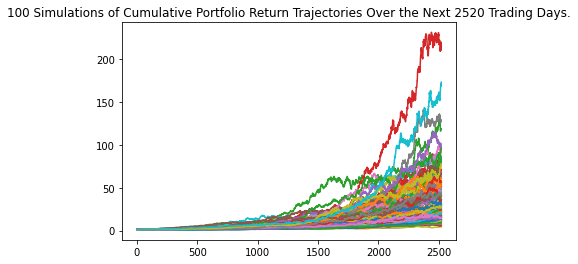

In [106]:
#The stocks you want to analyse
tickers = ['AAPL', 'GOOG', 'TSLA', 'AMZN']

#Data resolution 
timeframe = '1D'

#Range
start_date = '2015-1-1'
end_date = '2021-1-1'

#Amount to invest
inv_amt = 20000

#Portfolio weighting
wt = [0.25, 0.25, 0.25, 0.25]

#Desired number of simulations 
num_sim = 100

#Number of tradings days across which to run simulations
num_trade_days = 252 * 10

#Plot type ('line' or 'dist')
plot = 'line'

#Call and run function
analyse_my_finance(tickers, timeframe, start_date, end_date, inv_amt, wt, num_sim, num_trade_days, plot=plot)